In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [47]:
data = pd.read_csv('train.csv', sep=',')
data.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


(array([ 917., 2792., 3168., 1434.,  731.,  437.,  254.,  154.,   72.,
          41.]),
 array([ 59174.77802758, 116580.64688182, 173986.51573605, 231392.38459029,
        288798.25344453, 346204.12229876, 403609.991153  , 461015.86000724,
        518421.72886147, 575827.59771571, 633233.46656995]),
 <a list of 10 Patch objects>)

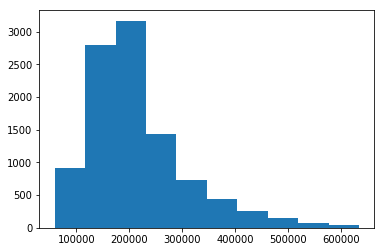

In [46]:

plt.hist(data["Price"].dropna())


In [28]:
# Функция считает пропущенные значения
def missing_values_table(df):
        # всего пропущенных
        mis_val = df.isnull().sum()
        
        # процент пропущенных
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Создаём таблицу результатов
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропущенные значения', 1 : '% от Всего'})
        
        # Сортировка по процентам пропущенных
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от Всего', ascending=False).round(1)
        
        # Печать саммари
        print ("Датафрейм имеет " + str(df.shape[1]) + " столбцов (столбца).\n"      
            "Среди них " + str(mis_val_table_ren_columns.shape[0]) +
              " столбцов (столбца) имеют пропущенные значения.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values_table(data)


Датафрейм имеет 20 столбцов (столбца).
Среди них 2 столбцов (столбца) имеют пропущенные значения.


,Пропущенные значения,% от Всего
Healthcare_1,4798,48.0
LifeSquare,2113,21.1


In [31]:
test_data = pd.read_csv('test.csv', sep=',')
missing_values_table(test_data)


Датафрейм имеет 19 столбцов (столбца).
Среди них 2 столбцов (столбца) имеют пропущенные значения.


,Пропущенные значения,% от Всего
Healthcare_1,2377,47.5
LifeSquare,1041,20.8


Тестовые данные имеют примерно такое же число пропущенных значений в тех же самых столбцах.

In [16]:
# Смотрим степени влияния каждого признака на цену с помощью корреляции
correlations_data = data.corr()['Price'].sort_values()
correlations_data 

Ecology_1       -0.058381
HouseYear        0.004305
Id               0.009880
KitchenSquare    0.028864
Social_3         0.074878
LifeSquare       0.081292
HouseFloor       0.088280
Floor            0.128715
Healthcare_1     0.138755
Shops_1          0.180876
Social_2         0.239226
Helthcare_2      0.253090
Social_1         0.263286
DistrictId       0.265100
Square           0.520075
Rooms            0.550291
Price            1.000000
Name: Price, dtype: float64

In [36]:
# pd.isnull(data).any()
data_wo_nan = data.dropna()


In [57]:
#TODO: Заменить буквенное числовым
data['Shops_2'].unique()

array(['B', 'A'], dtype=object)